In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Read in the data 
df=pd.read_csv("./Data/kc_house_data.csv")

# #View the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#Basic information, Exploring my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
#Describe the data - Descriptive statistics.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#Find the duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape

(21613, 21)

In [7]:
#Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#Datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# convert date column to type 'datetime'
df["date"]= pd.to_datetime(df["date"])

df["month"] = df["date"].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [4]:
# the numbers of unique values in each columns
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [11]:
# Compute the correlation
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.011708
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566,-0.346640
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.010081
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.001533
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.007392
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.011810
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.002369
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.014005
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.008132
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,-0.005638


<Axes: >

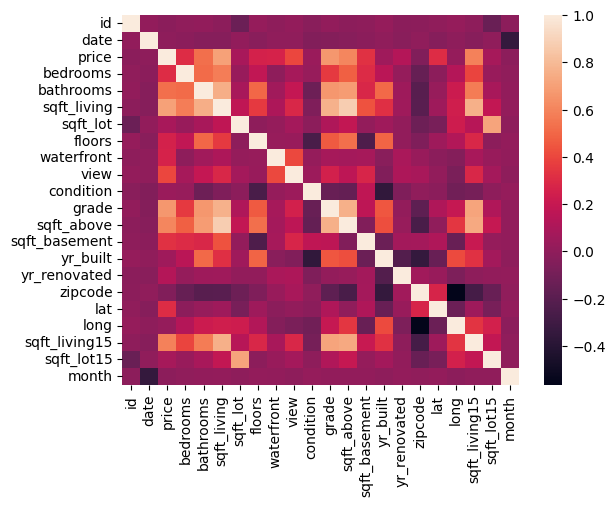

In [12]:
#Correlation matrix and plot it
sns.heatmap(df.corr())

=======================Stakeholder info=======================

    Stakeholder: Jennifer Montgomery (Buyer)

    Characteristics:

        High budget, (price is not important)
        wants to show off 
        timing within a month, time is important
        waterfront, renovated, high grades year


=======================Hypothesis=======================

    Hypothesis 1 :
    If a house is waterfront, then it will be more expensive, more luxurious, and located in specific high-value areas of King County.

    Hypothesis 2:
    If a house has a high Grade,then it will have a higher price and is more likely to be renovated.


    Hypothesis 3:
    If luxury houses are more frequently sold during summer months,then buying in summer will be faster and easier for Jennifer.

    Expensive and luxury homes are more popular in the summer due to better exposure (sun, weather, better view of the water). considering the limited time


=======================Analysis to prove Hypothesis right/wrong=======================

    --------------------------Analysis of Hypothesis 1: --------------------------

    If a house is waterfront, then it will be more expensive, more luxurious, and located in specific high-value areas of King County.
    Is Average Price waterfront greater than Average Price non-waterfront?

Average Price waterfront:  1661876.025 $
Average Price non-waterfront:  531563.6 $
Is Average Price waterfront greater than Average Price non-waterfront? yes, the hypothesis is true


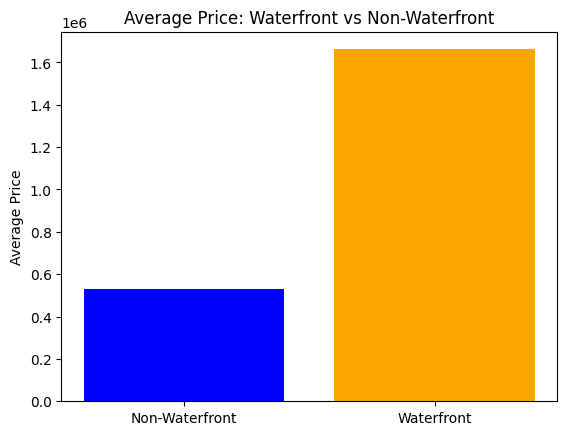

In [5]:
#calculating Average price of waterfront and non-waterfront Houses
mean_waterfront = df[df["waterfront"]==1]["price"].mean()
mean_non_waterfront = df[df["waterfront"]==0]["price"].mean()
print ("Average Price waterfront: ",round(mean_waterfront,3),"$")
print ("Average Price non-waterfront: ",round(mean_non_waterfront,3),"$")


if (mean_waterfront > mean_non_waterfront):
    result= "yes, the hypothesis is true" 
else: result= "no, the hypothesis is not true" 

print("Is Average Price waterfront greater than Average Price non-waterfront?",result)

# Visualisation
prices = [mean_non_waterfront, mean_waterfront]
labels = ['Non-Waterfront', 'Waterfront']

plt.bar(labels, prices, color=['blue','orange'])
plt.ylabel("Average Price")
plt.title("Average Price: Waterfront vs Non-Waterfront")
plt.show()


In [8]:
import plotly.express as px

luxury = df[(df['waterfront'] == 1) & (df['grade'] >= 10)]

fig = px.scatter_map(
    luxury,
    lat="lat",
    lon="long",
    color="price",
    size="price",
    size_max=25,
    zoom=9,
    center={"lat": 47.55, "lon": -122.25},
    map_style="open-street-map",
    title="Luxury Waterfront Houses in King County",
    hover_name="id",
    hover_data={
        "price": ":,.0f",
        "grade": True
    }
)

fig.update_layout(
    width=850,
    height=550,
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig.show()
fig.write_html("luxury_waterfront_map.html")

    by looking at the color/size, waterfront and luxury (high-grade) homes are concentrated in specific geographic areas.

    The color and size of the dots indicate that these homes are more expensive

    The hypothesis is confirmed: waterfront and luxury homes are both more expensive and concentrated in specific geographic areas

    --------------------------Analysis of Hypothesis 2: --------------------------
    If a house has a high Grade,then it will have a higher price.
    The higher the grade → the higher the average price

grade
1      142000.00
3      205666.67
4      214381.03
5      248523.97
6      301919.64
7      402590.26
8      542852.77
9      773513.19
10    1071771.07
11    1496841.73
12    2191222.00
13    3709615.38
Name: price, dtype: float64


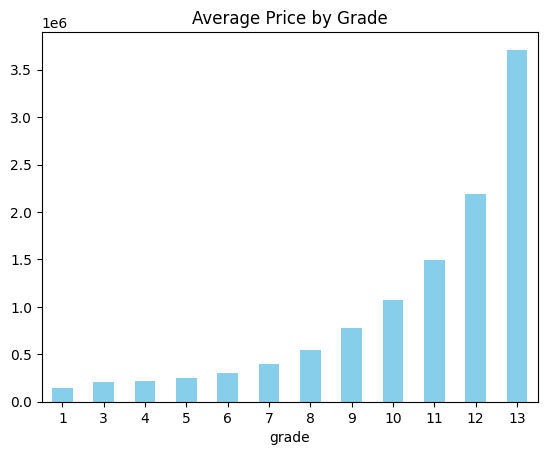

In [30]:
# Average Price fro each Grade (1-13) 
mean_grade = df.groupby("grade")["price"].mean()
print(round(mean_grade,2))

# Visualisation
mean_grade.plot(kind='bar', title="Average Price by Grade", color='skyblue')
plt.xticks(rotation="horizontal")
plt.show()

    --------------------------Analysis of Hypothesis 2: --------------------------
    If luxury houses are more frequently sold during summer months,then buying in summer will be faster and easier for Jennifer.

month
1     525870.89
2     507851.37
3     543977.19
4     561837.77
5     550768.79
6     558002.20
7     544788.76
8     536445.28
9     529253.82
10    539026.97
11    521961.01
12    524461.87
Name: price, dtype: float64
-------------
month
5     213
6     208
7     180
4     173
8     170
10    151
3     130
9     122
11    115
12    115
2      88
1      75
Name: count, dtype: int64


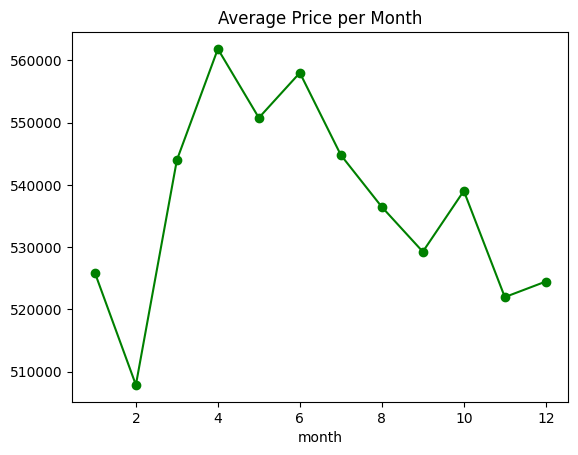

In [32]:
# Average Price fro each Month (1-12) 
mean_month = df.groupby("month")["price"].mean()
print(round(mean_month,2))

print("-------------")

#Counting the number of luxury sales per month
luxury = df[(df['waterfront'] == 1) | (df['grade'] >= 10)]
print(luxury['month'].value_counts())


# Visualisation- trend of average price changes,where the price goes up or down over the months
mean_month.plot(kind='line', marker='o', title="Average Price per Month", color='green')
plt.show()

    luxury homes have the highest average price in April. Summer months (June, July, August) still have relatively high prices, so She can buy in summer with reasonable speed."

=======================Recommendation=======================



	1.Focus on waterfront houses on specific premium areas (Waterfront and luxury homes are concentrated in specific areas of King County, so Jennifer should focus on these areas to buy quickly and confidently)

	2 Look for high Grade and good Condition (Waterfront or high-grade houses are more expensive and luxurious, so they are suitable for Jennifer’s goals)
	
	3 Target the right season.best timing: Prices peak in April, but summer (June–August) is also a good time to buy luxury homes quickly.

